In [2]:
import pickle
from matplotlib import pyplot as plt
import numpy as np 
import scipy.stats
import os

#https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n - 1)
    return m, m - h, m + h

def set_dict_entry(dictionary, keys, value):
    for key in keys[:-1]:
        dictionary = dictionary.setdefault(key, {})
    dictionary[keys[-1]] = value
    
def dict_iterator(dictionary, keys=None):
    if keys is None:
        keys = []
    for key, value in dictionary.items():
        new_keys = keys + [key]
        if isinstance(value, dict):
            for pair in dict_iterator(value, keys=new_keys):
                yield pair
        else:
            yield [new_keys, value]
            
def get_CI(dictionary):
    to_return = {}
    for val in dict_iterator(dictionary):
        utilities = val[1]
        set_dict_entry(to_return, val[0], mean_confidence_interval(utilities))
    return to_return

In [3]:
dir = 'Results/'
results = {}
for file in os.scandir(dir):
    if file.name.endswith('.p'):
        tokens = file.name[:-2].split('_')
        if "very" in tokens:
            with open(os.path.join(dir, file.name), 'rb') as input_file:
                value = pickle.load(input_file)
            set_dict_entry(results, [tokens[0], "very_"+ tokens[-1]], value)
        else:
            with open(os.path.join(dir, file.name), 'rb') as input_file:
                value = pickle.load(input_file)
            set_dict_entry(results, [tokens[0], tokens[-1]], value)
print(results)

CI_dict = get_CI(results)

print(CI_dict)

{'gaggle': {'tiny': [1.0595977306365967, 1.060164213180542, 1.0561034679412842, 1.0492842197418213, 1.0562734603881836, 1.0537054538726807, 1.0532152652740479, 1.0543313026428223, 1.1190719604492188, 1.0533757209777832, 1.0559611320495605, 1.0526938438415527, 1.0524163246154785, 1.0557632446289062, 1.0555410385131836, 1.0568008422851562, 1.0538301467895508, 1.0534682273864746, 1.0505619049072266, 1.1161298751831055, 1.058204174041748, 1.0556981563568115, 1.048529863357544, 1.048694372177124, 1.0629322528839111, 1.0539722442626953, 1.0541582107543945, 1.0559914112091064, 1.0522410869598389, 1.0536918640136719, 1.1115138530731201, 1.0554094314575195, 1.0537712574005127, 1.0541377067565918, 1.0526916980743408, 1.05253005027771, 1.0570049285888672, 1.051788330078125, 1.055952787399292, 1.057358741760254, 1.053431510925293, 1.1128122806549072, 1.0528779029846191, 1.0554122924804688, 1.0504701137542725, 1.0567259788513184, 1.0534453392028809, 1.0537128448486328, 1.0570063591003418, 1.0544643

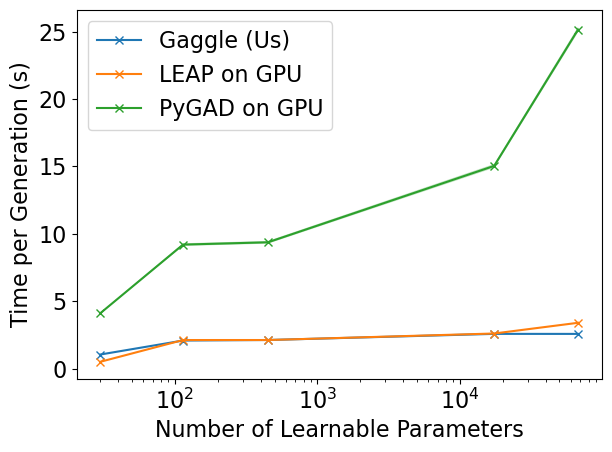

<Figure size 640x480 with 0 Axes>

In [7]:
model_sizes = ["tiny", "small", "medium", "large", "very_large"]
model_num_params = [30, 114, 450, 17410, 67590]
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams.update({'font.size': 16})

nice_names = {'gaggle':'Gaggle (Us)', 'leap': 'LEAP on GPU', 'pygad': 'PyGAD on GPU'}

for algorithm in nice_names:
    result = CI_dict[algorithm]
    values = [result[str(x)][0] for x in model_sizes]
    lower = [result[str(x)][1] for x in model_sizes]
    upper = [result[str(x)][2] for x in model_sizes]
    plt.semilogx(model_num_params, values, label=nice_names[algorithm], marker='x')
    plt.fill_between(model_num_params, lower, upper, alpha=0.3)
        
# plt.title("{} Dataset".format(dataset))
plt.xlabel("Number of Learnable Parameters")
plt.ylabel("Time per Generation (s)")
plt.tight_layout()
plt.legend()
plt.plot()
plt.savefig('Results/cartpole_plot.pdf', bbox_inches='tight')
plt.show()
plt.clf()